In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,plot_tree
import time
import os
import pickle
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from tqdm import tqdm

In [4]:
from xgboost import XGBRegressor, XGBClassifier, plot_importance

In [5]:
df = pd.read_csv('mw_pw_profiles.csv',low_memory=False)
df

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_pulse,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,fffa744b,1473475,male,6,2025-04-20,Indian Premier League,T20,Naman Dhir,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
416708,fffa744b,1473478,male,6,2025-04-23,Indian Premier League,T20,Naman Dhir,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,8,12
416709,fffa744b,1473482,male,6,2025-04-27,Indian Premier League,T20,Naman Dhir,25,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],37,8,49
416710,fffa744b,1473487,male,6,2025-05-01,Indian Premier League,T20,Naman Dhir,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4


In [6]:
df.drop(['gender', 'balls_per_over', 'series_name', 'name_y', 'unique_name','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz','key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2','key_cricinfo_3', 'key_cricingif', 'key_cricketarchive','key_cricketarchive_2', 'key_cricketworld', 'key_nvplay','key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2','full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams'], axis = 1, inplace = True)

In [7]:
df = df.sort_values(by='start_date')
df

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
397451,f44af07f,63963,2001-12-19,Test,C White,39,1,93,6,0,...,0,0,0,2,39,England,India,45,0,49
360396,de8cce37,63963,2001-12-19,Test,VVS Laxman,12,1,18,2,0,...,0,0,0,0,0,India,England,14,8,26
293914,b6cd714f,63963,2001-12-19,Test,Sarandeep Singh,4,1,16,0,0,...,4,0,1,5,96,India,England,4,76,84
175746,725529bc,63963,2001-12-19,Test,SC Ganguly,0,1,3,0,0,...,0,0,0,3,70,India,England,-4,0,0
2298,0184dc35,63963,2001-12-19,Test,R Dravid,3,1,61,0,0,...,0,0,0,0,0,India,England,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121900,4e38a3d6,1485778,2025-05-20,T20,R Poddar,4,1,10,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
305516,bd36bc39,1485778,2025-05-20,T20,S Chaturongrattana,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
401343,f6ddfe08,1485778,2025-05-20,T20,C Sutthiruang,0,0,0,0,0,...,0,0,0,0,10,Thailand,Nepal,0,12,16
258473,a2f46292,1473500,2025-05-20,T20,KK Ahmed,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0


In [8]:
df['strike_rate'] = (df['runs_scored']/df['balls_faced'])*100
df['strike_rate'] = df['strike_rate'].replace([np.inf, -np.inf], np.nan).clip(upper = 300).fillna(0)
df['batting_impact'] = df['runs_scored'] + 4*df['fours_scored'] + 6*df['sixes_scored']
df['bowling_impact'] = df['dot_balls_as_bowler'] + 25*df['wickets_taken']
df['fielding_impact'] = df['run_out_direct']*12 + df['run_out_throw']*6 + df['catches_taken']*8
df['overs_bowled'] = (df['balls_bowled']/6)
df['economy_rate'] = df['runs_conceded']/df['overs_bowled']
df['economy_rate'] = df['economy_rate'].replace([np.inf, -np.inf], np.nan).clip(upper = 25).fillna(0)
df['start_date'] = pd.to_datetime(df['start_date'])
df

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,strike_rate,batting_impact,bowling_impact,fielding_impact,overs_bowled,economy_rate
397451,f44af07f,63963,2001-12-19,Test,C White,39,1,93,6,0,...,India,45,0,49,41.935484,63,39,0,8.166667,3.183673
360396,de8cce37,63963,2001-12-19,Test,VVS Laxman,12,1,18,2,0,...,England,14,8,26,66.666667,20,0,8,0.000000,0.000000
293914,b6cd714f,63963,2001-12-19,Test,Sarandeep Singh,4,1,16,0,0,...,England,4,76,84,25.000000,4,196,0,21.166667,2.692913
175746,725529bc,63963,2001-12-19,Test,SC Ganguly,0,1,3,0,0,...,England,-4,0,0,0.000000,0,70,0,16.166667,3.154639
2298,0184dc35,63963,2001-12-19,Test,R Dravid,3,1,61,0,0,...,England,3,14,21,4.918033,3,0,14,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121900,4e38a3d6,1485778,2025-05-20,T20,R Poddar,4,1,10,0,0,...,Thailand,-2,0,2,40.000000,4,0,0,0.000000,0.000000
305516,bd36bc39,1485778,2025-05-20,T20,S Chaturongrattana,0,0,0,0,0,...,Nepal,0,16,20,0.000000,0,8,12,3.000000,5.666667
401343,f6ddfe08,1485778,2025-05-20,T20,C Sutthiruang,0,0,0,0,0,...,Nepal,0,12,16,0.000000,0,10,8,3.166667,5.052632
258473,a2f46292,1473500,2025-05-20,T20,KK Ahmed,0,0,0,0,0,...,Rajasthan Royals,0,-4,0,0.000000,0,6,0,3.000000,11.666667


In [9]:
label_encoder = LabelEncoder()
df['player_id'] = label_encoder.fit_transform(df['player_id'].fillna("Unknown"))
df['match_type'] = df['match_type'].fillna("Unknown")
df

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,strike_rate,batting_impact,bowling_impact,fielding_impact,overs_bowled,economy_rate
397451,11182,63963,2001-12-19,Test,C White,39,1,93,6,0,...,India,45,0,49,41.935484,63,39,0,8.166667,3.183673
360396,10187,63963,2001-12-19,Test,VVS Laxman,12,1,18,2,0,...,England,14,8,26,66.666667,20,0,8,0.000000,0.000000
293914,8394,63963,2001-12-19,Test,Sarandeep Singh,4,1,16,0,0,...,England,4,76,84,25.000000,4,196,0,21.166667,2.692913
175746,5248,63963,2001-12-19,Test,SC Ganguly,0,1,3,0,0,...,England,-4,0,0,0.000000,0,70,0,16.166667,3.154639
2298,80,63963,2001-12-19,Test,R Dravid,3,1,61,0,0,...,England,3,14,21,4.918033,3,0,14,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121900,3565,1485778,2025-05-20,T20,R Poddar,4,1,10,0,0,...,Thailand,-2,0,2,40.000000,4,0,0,0.000000,0.000000
305516,8689,1485778,2025-05-20,T20,S Chaturongrattana,0,0,0,0,0,...,Nepal,0,16,20,0.000000,0,8,12,3.000000,5.666667
401343,11315,1485778,2025-05-20,T20,C Sutthiruang,0,0,0,0,0,...,Nepal,0,12,16,0.000000,0,10,8,3.166667,5.052632
258473,7468,1473500,2025-05-20,T20,KK Ahmed,0,0,0,0,0,...,Rajasthan Royals,0,-4,0,0.000000,0,6,0,3.000000,11.666667


In [10]:
df.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'name_x',
       'runs_scored', 'player_out', 'balls_faced', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'out_kind', 'dot_balls_as_batsman', 'order_seen',
       'balls_bowled', 'runs_conceded', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'dot_balls_as_bowler', 'player_team',
       'opposition_team', 'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total', 'strike_rate', 'batting_impact',
       'bowling_impact', 'fielding_impact', 'overs_bowled', 'economy_rate'],
      dtype='object')

In [11]:
match_type = 'T20'
df = df[df['match_type'] == match_type]
df

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,strike_rate,batting_impact,bowling_impact,fielding_impact,overs_bowled,economy_rate
136723,4003,211048,2005-02-17,T20,SB Styris,66,1,39,5,3,...,Australia,89,0,93,169.230769,104,0,0,0.000000,0.000000
386551,10901,211048,2005-02-17,T20,GD McGrath,0,0,0,0,0,...,New Zealand,0,74,78,0.000000,0,55,20,4.000000,12.000000
403628,11387,211048,2005-02-17,T20,MJ Clarke,7,1,4,0,1,...,New Zealand,9,4,17,175.000000,13,4,0,2.000000,5.500000
111599,3309,211048,2005-02-17,T20,MEK Hussey,31,0,15,1,3,...,New Zealand,48,8,60,206.666667,53,0,8,0.000000,0.000000
127575,3737,211048,2005-02-17,T20,AR Adams,7,1,7,1,0,...,Australia,8,-2,10,100.000000,11,6,0,4.000000,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121900,3565,1485778,2025-05-20,T20,R Poddar,4,1,10,0,0,...,Thailand,-2,0,2,40.000000,4,0,0,0.000000,0.000000
305516,8689,1485778,2025-05-20,T20,S Chaturongrattana,0,0,0,0,0,...,Nepal,0,16,20,0.000000,0,8,12,3.000000,5.666667
401343,11315,1485778,2025-05-20,T20,C Sutthiruang,0,0,0,0,0,...,Nepal,0,12,16,0.000000,0,10,8,3.166667,5.052632
258473,7468,1473500,2025-05-20,T20,KK Ahmed,0,0,0,0,0,...,Rajasthan Royals,0,-4,0,0.000000,0,6,0,3.000000,11.666667


In [12]:
def split_data(df,date):
    train = df[df['start_date']< pd.to_datetime(date)]
    test = df[df['start_date']>= pd.to_datetime(date)]
    return train,test

In [13]:

date_of_match = pd.to_datetime("21-09-2024" , dayfirst=True)
df_train,df_test = split_data(df,date_of_match)
df_train.sort_values(by=['start_date'])
df_test.sort_values(by=['start_date'])
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [14]:
tqdm.pandas()
def calculate_rolling_average(df):
    df['runs_scored_1'] = df['runs_scored'].shift(1).rolling(window=1,min_periods=1).mean()
    df['runs_scored_5'] = df['runs_scored'].shift(1).rolling(window=5,min_periods=1).mean()
    df['runs_scored_10'] = df['runs_scored'].shift(1).rolling(window=10,min_periods=5).mean()

    df['strike_rate_1'] = df['strike_rate'].shift(1).rolling(window=1,min_periods=1).mean()
    df['strike_rate_5'] = df['strike_rate'].shift(1).rolling(window=5,min_periods=1).mean()
    df['strike_rate_10'] = df['runs_scored'].shift(1).rolling(window=10,min_periods=5).mean()

    df['fours_scored_1'] = df['fours_scored'].shift(1).rolling(window=1,min_periods=1).mean()
    df['fours_scored_5'] = df['fours_scored'].shift(1).rolling(window=5,min_periods=1).mean()
    df['fours_scored_10'] = df['fours_scored'].shift(1).rolling(window=10,min_periods=5).mean()

    df['sixes_scored_1'] = df['sixes_scored'].shift(1).rolling(window=1,min_periods=1).mean()
    df['sixes_scored_5'] = df['sixes_scored'].shift(1).rolling(window=5,min_periods=1).mean()
    df['sixes_scored_10'] = df['sixes_scored'].shift(1).rolling(window=10,min_periods=5).mean()

    df['economy_rate_1'] = df['economy_rate'].shift(1).rolling(window=1,min_periods=1).mean()
    df['economy_rate_5'] = df['economy_rate'].shift(1).rolling(window=5,min_periods=1).mean()
    df['economy_rate_10'] = df['economy_rate'].shift(1).rolling(window=10,min_periods=5).mean()

    df['wickets_taken_1'] = df['wickets_taken'].shift(1).rolling(window=1,min_periods=1).mean()
    df['wickets_taken_5'] = df['wickets_taken'].shift(1).rolling(window=5,min_periods=1).mean()
    df['wickets_taken_10'] = df['wickets_taken'].shift(1).rolling(window=10,min_periods=5).mean()

    df['fantasy_score_1'] = df['fantasy_score_total'].shift(1).rolling(window=1,min_periods=1).mean()
    df['fantasy_score_5'] = df['fantasy_score_total'].shift(1).rolling(window=5,min_periods=1).mean()
    df['fantasy_score_10'] = df['fantasy_score_total'].shift(1).rolling(window=10,min_periods=5).mean()
    df['fantasy_score_15'] = df['fantasy_score_total'].shift(1).rolling(window=15,min_periods=10).mean()

    return df

df_stats = df.groupby('player_id').progress_apply(calculate_rolling_average).reset_index(drop=True)

100%|██████████| 9966/9966 [00:29<00:00, 337.46it/s]


In [15]:
df_stats.head()

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,economy_rate_1,economy_rate_5,economy_rate_10,wickets_taken_1,wickets_taken_5,wickets_taken_10,fantasy_score_1,fantasy_score_5,fantasy_score_10,fantasy_score_15
0,0,1158348,2018-08-21,T20,M King,10,1,30,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1182644,2019-05-05,T20,M King,8,1,18,1,0,...,0.0,0.0,NaN,0.0,0.0,NaN,17.0,17.000000,NaN,NaN
2,0,1275107,2021-09-09,T20,M King,1,0,5,0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,7.0,12.000000,NaN,NaN
3,0,1275125,2021-09-14,T20,M King,1,1,15,0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,5.0,9.666667,NaN,NaN
4,0,1275113,2021-09-15,T20,M King,0,0,0,0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,-1.0,7.000000,NaN,NaN


In [16]:
def player_features(df):
    features = []
    for player_id,group in df.groupby('player_id'):
        group = group.sort_values(by='start_date')
        group = calculate_rolling_average(group)
        features.append(group)
    result_df = pd.concat(features).reset_index(drop=True)
    return result_df['player_id','name_x', 'match_id', 'match_type', 'start_date', 'fantasy_score_total','fantasy_score_1','fantasy_score_5','fantasy_score_10','fantasy_score_15','runs_scored_1','runs_scored_5','runs_scored_10','strike_rate_1','strike_rate_5','strike_rate_10','fours_scored_1','fours_scored_5','fours_scored_10','sixes_scored_1','sixes_scored_5','sixes_scored_10','economy_rate_1','economy_rate_5','economy_rate_10','wickets_taken_1','wickets_taken_5','wickets_taken_10','order_seen','overs_bowled']

def get_features_all_players(df):
    df_features = df.groupby('player_id').progress_apply(calculate_rolling_average).reset_index(drop=True)
    df_features.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_column = df_features.select_dtypes(include='number').columns
    df_features[numeric_column] = df_features[numeric_column].fillna(0)
    selected_columns = ['player_id','name_x', 'match_id', 'match_type', 'start_date', 'fantasy_score_total','fantasy_score_1','fantasy_score_5','fantasy_score_10','fantasy_score_15','runs_scored_1','runs_scored_5','runs_scored_10','strike_rate_1','strike_rate_5','strike_rate_10','fours_scored_1','fours_scored_5','fours_scored_10','sixes_scored_1','sixes_scored_5','sixes_scored_10','economy_rate_1','economy_rate_5','economy_rate_10','wickets_taken_1','wickets_taken_5','wickets_taken_10','order_seen','overs_bowled']
    return df_features[selected_columns]


In [17]:
df_all_features = get_features_all_players(df)
df_train_features = df_all_features[df_all_features['start_date'] < date_of_match]
df_test_features = df_all_features[df_all_features['start_date'] >= date_of_match]

100%|██████████| 9966/9966 [00:28<00:00, 345.78it/s]


In [18]:
df_all_features

,player_id,name_x,match_id,match_type,start_date,fantasy_score_total,fantasy_score_1,fantasy_score_5,fantasy_score_10,fantasy_score_15,...,sixes_scored_5,sixes_scored_10,economy_rate_1,economy_rate_5,economy_rate_10,wickets_taken_1,wickets_taken_5,wickets_taken_10,order_seen,overs_bowled
0,0,M King,1158348,T20,2018-08-21,17,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,M King,1182644,T20,2019-05-05,7,17.0,17.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0,M King,1275107,T20,2021-09-09,5,7.0,12.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0
3,0,M King,1275125,T20,2021-09-14,-1,5.0,9.666667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0
4,0,M King,1275113,T20,2021-09-15,4,-1.0,7.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252660,11770,Naman Dhir,1473475,T20,2025-04-20,4,2.0,44.400000,40.9,36.000000,...,1.2,1.3,0.0,0.0,2.9,0.0,0.0,0.0,0,0.0
252661,11770,Naman Dhir,1473478,T20,2025-04-23,12,4.0,38.800000,41.1,35.933333,...,1.2,1.3,0.0,0.0,2.9,0.0,0.0,0.0,0,0.0
252662,11770,Naman Dhir,1473482,T20,2025-04-27,49,12.0,24.000000,39.7,34.000000,...,0.6,1.1,0.0,0.0,2.9,0.0,0.0,0.0,7,0.0
252663,11770,Naman Dhir,1473487,T20,2025-05-01,4,49.0,28.600000,35.2,32.866667,...,0.8,0.8,0.0,0.0,0.4,0.0,0.0,0.0,0,0.0


In [19]:
df_train_features.sort_values(by=['start_date'])
df_train_features.reset_index(drop=True)
df_train_features

,player_id,name_x,match_id,match_type,start_date,fantasy_score_total,fantasy_score_1,fantasy_score_5,fantasy_score_10,fantasy_score_15,...,sixes_scored_5,sixes_scored_10,economy_rate_1,economy_rate_5,economy_rate_10,wickets_taken_1,wickets_taken_5,wickets_taken_10,order_seen,overs_bowled
0,0,M King,1158348,T20,2018-08-21,17,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000
1,0,M King,1182644,T20,2019-05-05,7,17.0,17.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
2,0,M King,1275107,T20,2021-09-09,5,7.0,12.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,10,0.000000
3,0,M King,1275125,T20,2021-09-14,-1,5.0,9.666667,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4,0.000000
4,0,M King,1275113,T20,2021-09-15,4,-1.0,7.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252648,11770,Naman Dhir,1422132,T20,2024-04-01,2,66.0,34.200000,30.833333,0.0,...,1.2,1.000000,0.000000,2.600000,2.166667,0.0,0.0,0.0,3,0.000000
252649,11770,Naman Dhir,1426289,T20,2024-05-03,17,2.0,26.400000,26.714286,0.0,...,0.8,0.857143,0.000000,2.600000,1.857143,0.0,0.0,0.0,0,3.166667
252650,11770,Naman Dhir,1426293,T20,2024-05-06,2,17.0,26.200000,25.500000,0.0,...,0.6,0.750000,7.894737,4.178947,2.611842,0.0,0.0,0.0,0,0.000000
252651,11770,Naman Dhir,1426298,T20,2024-05-11,26,2.0,25.600000,22.888889,0.0,...,0.6,0.666667,0.000000,4.178947,2.321637,0.0,0.0,0.0,0,0.000000


In [20]:
df_test_features.sort_values(by=['start_date'],ascending=True)
df_test_features.reset_index(drop=True)
df_test_features

,player_id,name_x,match_id,match_type,start_date,fantasy_score_total,fantasy_score_1,fantasy_score_5,fantasy_score_10,fantasy_score_15,...,sixes_scored_5,sixes_scored_10,economy_rate_1,economy_rate_5,economy_rate_10,wickets_taken_1,wickets_taken_5,wickets_taken_10,order_seen,overs_bowled
23,3,M Tarimiala,1474423,T20,2025-03-10,20,4.0,7.8,10.3,9.666667,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
24,3,M Tarimiala,1474424,T20,2025-03-11,16,20.0,11.0,9.5,10.461538,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
25,3,M Tarimiala,1474429,T20,2025-03-14,2,16.0,10.2,9.9,10.857143,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,11,0.000000
98,6,JJ Bazley,1443059,T20,2024-12-17,60,7.0,13.0,14.3,22.733333,...,0.2,0.1,14.333333,10.353333,9.743333,0.0,0.2,0.2,8,1.166667
99,6,JJ Bazley,1443062,T20,2024-12-20,22,60.0,16.4,20.3,24.066667,...,0.6,0.3,16.285714,12.210476,10.205238,0.0,0.0,0.2,6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252660,11770,Naman Dhir,1473475,T20,2025-04-20,4,2.0,44.4,40.9,36.000000,...,1.2,1.3,0.000000,0.000000,2.900000,0.0,0.0,0.0,0,0.000000
252661,11770,Naman Dhir,1473478,T20,2025-04-23,12,4.0,38.8,41.1,35.933333,...,1.2,1.3,0.000000,0.000000,2.900000,0.0,0.0,0.0,0,0.000000
252662,11770,Naman Dhir,1473482,T20,2025-04-27,49,12.0,24.0,39.7,34.000000,...,0.6,1.1,0.000000,0.000000,2.900000,0.0,0.0,0.0,7,0.000000
252663,11770,Naman Dhir,1473487,T20,2025-05-01,4,49.0,28.6,35.2,32.866667,...,0.8,0.8,0.000000,0.000000,0.400000,0.0,0.0,0.0,0,0.000000


In [21]:
X_train = df_train_features.drop(['fantasy_score_total' , 'start_date' , 'player_id' , 'name_x' , 'match_id' , 'match_type'] , axis=1)
y_train = df_train_features['fantasy_score_total']

In [22]:
X_train

,fantasy_score_1,fantasy_score_5,fantasy_score_10,fantasy_score_15,runs_scored_1,runs_scored_5,runs_scored_10,strike_rate_1,strike_rate_5,strike_rate_10,...,sixes_scored_5,sixes_scored_10,economy_rate_1,economy_rate_5,economy_rate_10,wickets_taken_1,wickets_taken_5,wickets_taken_10,order_seen,overs_bowled
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000
1,17.0,17.000000,0.000000,0.0,10.0,10.000000,0.000000,33.333333,33.333333,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
2,7.0,12.000000,0.000000,0.0,8.0,9.000000,0.000000,44.444444,38.888889,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,10,0.000000
3,5.0,9.666667,0.000000,0.0,1.0,6.333333,0.000000,20.000000,32.592593,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4,0.000000
4,-1.0,7.000000,0.000000,0.0,1.0,5.000000,0.000000,6.666667,26.111111,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252648,66.0,34.200000,30.833333,0.0,30.0,16.000000,14.833333,200.000000,144.294872,14.833333,...,1.2,1.000000,0.000000,2.600000,2.166667,0.0,0.0,0.0,3,0.000000
252649,2.0,26.400000,26.714286,0.0,0.0,12.600000,12.714286,0.000000,101.794872,12.714286,...,0.8,0.857143,0.000000,2.600000,1.857143,0.0,0.0,0.0,0,3.166667
252650,17.0,26.200000,25.500000,0.0,11.0,12.400000,12.500000,100.000000,103.333333,12.500000,...,0.6,0.750000,7.894737,4.178947,2.611842,0.0,0.0,0.0,0,0.000000
252651,2.0,25.600000,22.888889,0.0,0.0,12.200000,11.111111,0.000000,93.333333,11.111111,...,0.6,0.666667,0.000000,4.178947,2.321637,0.0,0.0,0.0,0,0.000000


In [23]:
X_test = df_test_features.drop(['fantasy_score_total' , 'start_date' , 'player_id' , 'name_x' , 'match_id' , 'match_type'] , axis=1)
y_test = df_test_features['fantasy_score_total']

In [24]:
model = XGBRegressor(n_estimators=200 , learning_rate=0.1 , max_depth = 15, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [25]:
fantasy_score_pred_xgb = model.predict(X_test)
fantasy_score_pred_xgb = fantasy_score_pred_xgb.astype(int)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

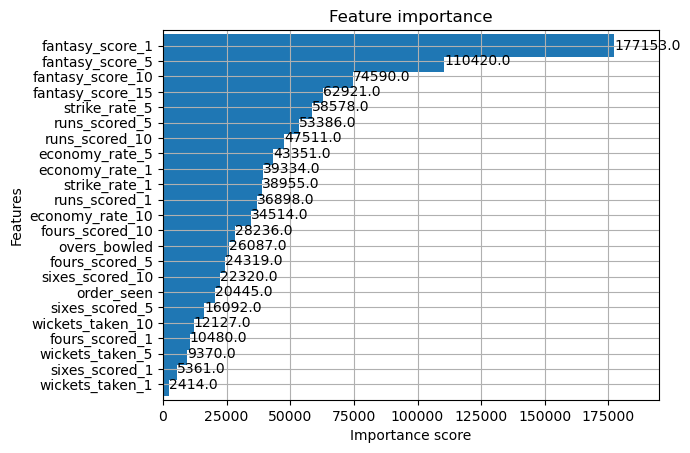

In [26]:
from xgboost import plot_importance
plot_importance(model, max_num_features=25, height=1.5)

In [27]:
importance_values = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importance_values}).sort_values(by='importance', ascending=False)
print(feature_importance_df.head(20))

        feature_name  importance
23      overs_bowled    0.179219
6     runs_scored_10    0.073083
22        order_seen    0.051395
19   wickets_taken_1    0.044691
21  wickets_taken_10    0.041747
18   economy_rate_10    0.040969
20   wickets_taken_5    0.039628
12   fours_scored_10    0.039476
15   sixes_scored_10    0.039106
17    economy_rate_5    0.038060
13    sixes_scored_1    0.037578
10    fours_scored_1    0.036892
8      strike_rate_5    0.036308
11    fours_scored_5    0.036133
16    economy_rate_1    0.035491
5      runs_scored_5    0.035457
14    sixes_scored_5    0.035256
7      strike_rate_1    0.034275
3   fantasy_score_15    0.032740
4      runs_scored_1    0.029555


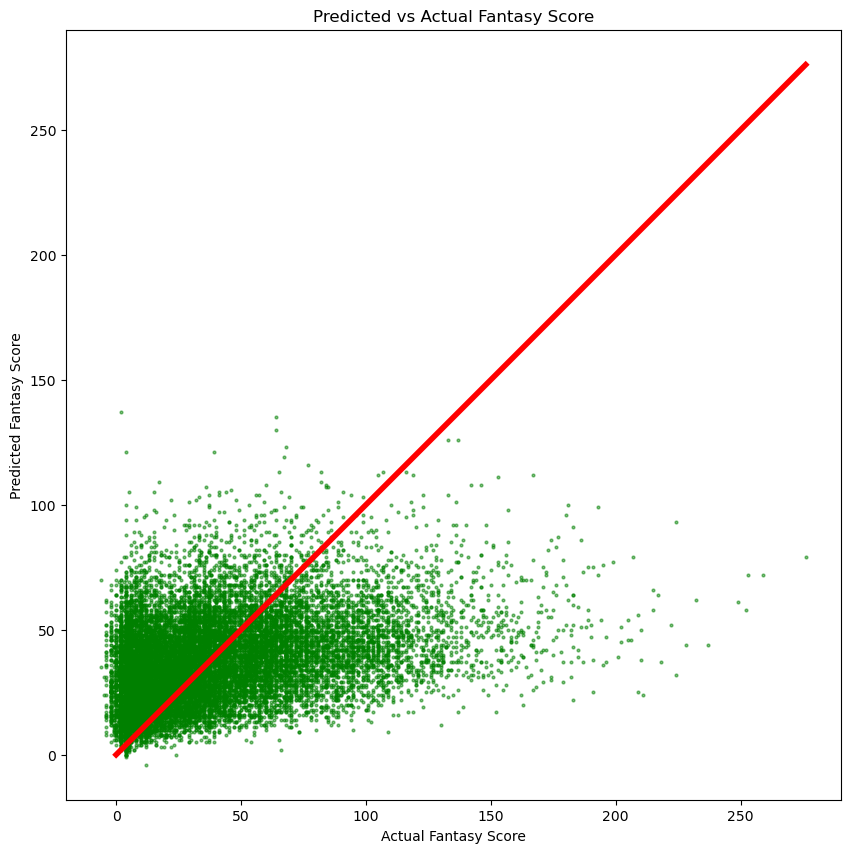

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, fantasy_score_pred_xgb, alpha=0.5 , color='green' , s = 4)
plt.xlabel('Actual Fantasy Score')
plt.ylabel('Predicted Fantasy Score')
plt.title("Predicted vs Actual Fantasy Score")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red',linewidth=4)
plt.show()

In [29]:
predictions_df = pd.DataFrame({
    'player_id' : df_test_features['player_id'],
    'match_id' : df_test_features['match_id'],
    'actual_fantasy_score' : df_test_features['fantasy_score_total'],
    'predicted_fantasy_score' : fantasy_score_pred_xgb,
})
predictions_df

,player_id,match_id,actual_fantasy_score,predicted_fantasy_score
23,3,1474423,20,9
24,3,1474424,16,12
25,3,1474429,2,7
98,6,1443059,60,21
99,6,1443062,22,33
...,...,...,...,...
252660,11770,1473475,4,31
252661,11770,1473478,12,30
252662,11770,1473482,49,29
252663,11770,1473487,4,29


In [30]:
def mape_sum_top_11_per_match(group):
    group_predicted = group.sort_values(by='predicted_fantasy_score', ascending=False).head(11)
    group_predicted = group.reset_index(drop=True)
    predicted_top_11_sum = group_predicted['actual_fantasy_score'].sum()
    group_actual = group.sort_values(by='actual_fantasy_score', ascending=False).head(11)
    group_actual = group_actual.reset_index(drop=True)
    actual_top_11_sum = group_actual['actual_fantasy_score'].sum()
    return abs(actual_top_11_sum-predicted_top_11_sum)/actual_top_11_sum * 100


In [31]:
mape_by_match = predictions_df.groupby('match_id')[['actual_fantasy_score' , 'predicted_fantasy_score']].apply(mape_sum_top_11_per_match)
mape = mape_by_match.mean()
print(f"Mean Absolute Percentage Error : {mape : .2f} %")

Mean Absolute Percentage Error :  20.27 %


In [32]:
actual_top11 = (
    predictions_df.sort_values(['match_id', 'actual_fantasy_score'], ascending=[True, False])
    .groupby('match_id')
    .head(11)
    .groupby('match_id')['actual_fantasy_score']
    .sum()
    .rename('actual_fantasy_score_of_actual_top11')
)
predicted_top11 = (
    predictions_df.sort_values(['match_id', 'predicted_fantasy_score'], ascending=[True, False])
    .groupby('match_id')
    .head(11)
    .groupby('match_id')['actual_fantasy_score']
    .sum()
    .rename('actual_fantasy_score_of_predicted_top11')
)
top11_df = pd.concat([actual_top11, predicted_top11], axis=1)

In [33]:
top11_df

,actual_fantasy_score_of_actual_top11,actual_fantasy_score_of_predicted_top11
match_id,,
1426552,576,247
1426553,848,617
1426554,647,464
1426618,704,608
1426619,668,517
...,...,...
1484052,762,570
1485778,649,589
1486225,846,706


In [34]:
top11_df['MAPE'] = abs(top11_df['actual_fantasy_score_of_actual_top11']-top11_df['actual_fantasy_score_of_predicted_top11'])/top11_df['actual_fantasy_score_of_actual_top11'] *100
top11_df

,actual_fantasy_score_of_actual_top11,actual_fantasy_score_of_predicted_top11,MAPE
match_id,,,
1426552,576,247,57.118056
1426553,848,617,27.240566
1426554,647,464,28.284389
1426618,704,608,13.636364
1426619,668,517,22.604790
...,...,...,...
1484052,762,570,25.196850
1485778,649,589,9.244992
1486225,846,706,16.548463


# Stacking

In [35]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

In [36]:
model_xgb = XGBRegressor(n_estimators=200 , learning_rate=0.1 , max_depth = 15, random_state=42)
model_gbr = GradientBoostingRegressor(n_estimators=150 , random_state=42)
model_ridge = Ridge(alpha = 1.0)

model_xgb.fit(X_train, y_train)
model_gbr.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)

Ridge()

In [37]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb = y_pred_xgb.astype(int)
y_pred_gbr = model_gbr.predict(X_test)
y_pred_gbr = y_pred_gbr.astype(int)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_ridge = y_pred_ridge.astype(int)

In [38]:
def evaluate(model_name, y_true, y_pred):
    print(f"{model_name} :")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("\n")
    return

evaluate("XGBoost", y_test, y_pred_xgb)
evaluate("Gradient Boosting Regressor", y_test, y_pred_gbr)
evaluate("Ridge", y_test, y_pred_ridge)


XGBoost :
R² Score: 0.15532138230548675
MAE: 23.38047536654221
RMSE: 31.602781782782397


Gradient Boosting Regressor :
R² Score: 0.213366822825672
MAE: 22.574811037246153
RMSE: 30.4976019485999


Ridge :
R² Score: 0.19518420790471436
MAE: 22.851379655769055
RMSE: 30.848056442592977




In [39]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [40]:
base_learners = [
    ('xgb' , XGBRegressor(n_estimators=200 , learning_rate=0.1 , max_depth = 15, n_jobs=-1 , random_state=42 )),
    ('ridge' , make_pipeline(StandardScaler(), Ridge(alpha = 0.1))),
    ('gbr' , GradientBoostingRegressor(n_estimators=150 , random_state=42 ))
]

meta_learner = HistGradientBoostingRegressor(max_iter=200 , learning_rate=0.1, random_state=42)

In [41]:
stack_model = StackingRegressor(
estimators = base_learners,
final_estimator = meta_learner,
passthrough = True,
cv = 5,
n_jobs = -1,
)
stack_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_co...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('ridge',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('ridge', Ridge(alpha=0.1))])),
                              ('gbr',
                               GradientBoostingRegressor(n_estimators=150,
                                                         random_state=42))],
                  final_estimator=HistGradientBoostingRegressor(max_iter=200,
                                                                random_state=42),
                  n_jobs=-1, passthrough=True)

In [42]:
y_pred_stack_train = stack_model.predict(X_train)
print("R2 Score:", r2_score(y_train, y_pred_stack_train))
print("MAE:", mean_absolute_error(y_train, y_pred_stack_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_stack_train)))

R2 Score: 0.20813281415547424
MAE: 22.399675920116138
RMSE: 29.606651059642086


In [43]:
y_pred_stack_test = stack_model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_stack_test))
print("MAE:", mean_absolute_error(y_test, y_pred_stack_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack_test)))

R2 Score: 0.21313248878902624
MAE: 22.67183524270034
RMSE: 30.502144150876212


In [44]:
predictions_df['predicted_fantasy_score_stacked_model'] = stack_model.predict(X_test).astype(int)
predictions_df

,player_id,match_id,actual_fantasy_score,predicted_fantasy_score,predicted_fantasy_score_stacked_model
23,3,1474423,20,9,11
24,3,1474424,16,12,16
25,3,1474429,2,7,9
98,6,1443059,60,21,20
99,6,1443062,22,33,25
...,...,...,...,...,...
252660,11770,1473475,4,31,32
252661,11770,1473478,12,30,32
252662,11770,1473482,49,29,24
252663,11770,1473487,4,29,30


In [45]:
pip install --upgrade gradio

  Using cached gradio-5.38.2-py3-none-any.whl.metadata (16 kB)
  Using cached gradio_client-1.11.0-py3-none-any.whl.metadata (7.1 kB)
Using cached gradio-5.38.2-py3-none-any.whl (59.5 MB)
Using cached gradio_client-1.11.0-py3-none-any.whl (324 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.7/815.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.10.4
    Uninstalling gradio_client-1.10.4:
      Successfully uninstalled gradio_client-1.10.4
  Attempting uninstall: gradio
    Found existing installation: gradio 5.35.0
    Uninstalling gradio-5.35.0:
      Successfully uninstalled gradio-5.35.0
Note: you may need to restart the kernel to use updated packages.


In [61]:
import gradio as gr

In [62]:
def get_top_11_players(*player_ids):
    player_ids = list(player_ids)
    player_data = predictions_df[predictions_df['player_id'].isin(player_ids)]
    player_data.drop_duplicates('player_id', inplace=True)
    top_11_df = player_data.sort_values(by='predicted_fantasy_score_stacked_model', ascending=False).head(11)
    return top_11_df[['player_id', 'predicted_fantasy_score_stacked_model']].values.tolist()

In [63]:
inputs = [gr.Textbox(label=f"Player ID {i+1}") for i in range(22)]
outputs = gr.Dataframe(headers=["Player ID", "Predicted Fantasy Score"])

gr.Interface(
    fn=get_top_11_players,
    inputs=inputs,
    outputs=outputs,
    title="Fantasy XI Predictor",
    description="Enter 22 Player IDs to get the 11 with highest predicted fantasy scores."
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7865
* Running on public URL: https://a739f0a235f6be6a5a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
